### Zadanie: przestępczość
#### 1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [254]:
import pandas as pd
crimes = pd.read_csv('fatal-police-shootings-data.csv')
crimes.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [255]:
type(crimes)

pandas.core.frame.DataFrame

In [273]:
type(crimes['signs_of_mental_illness'])

pandas.core.series.Series

In [278]:
type(crimes.loc[0][10])

numpy.bool_

In [256]:
crimes.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

#### 2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [259]:
import numpy as np
df = crimes.groupby(['race','signs_of_mental_illness']).count()
df

id  name  date  ...  threat_level  flee  body_camera
race signs_of_mental_illness                    ...                                 
A    False                      69    69    69  ...            69    64           69
     True                       24    24    24  ...            24    24           24
B    False                    1114  1114  1114  ...          1114  1067         1114
     True                      184   184   184  ...           184   181          184
H    False                     745   745   745  ...           745   702          745
     True                      157   157   157  ...           157   150          157
N    False                      64    64    64  ...            64    59           64
     True                       14    14    14  ...            14    14           14
O    False                      37    37    37  ...            37    36           37
     True                       11    11    11  ...            11    11           11
W    False                    1763  1763  1763  ...          1763  1686         1763
     True                      713   713   713  ...           713   694          713

[12 rows x 12 columns]

In [280]:
df.loc['A'].iloc[1]

id                 24
name               24
date               24
manner_of_death    24
armed              24
age                24
gender             24
city               24
state              24
threat_level       24
flee               24
body_camera        24
Name: True, dtype: int64

In [281]:
df.drop(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'city', 'state', 'threat_level', 'flee', 'body_camera'], axis=1, inplace=True)
df

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

In [282]:
df.rename(columns={"id": "volume"}, inplace=True)
df

volume
race signs_of_mental_illness        
A    False                        69
     True                         24
B    False                      1114
     True                        184
H    False                       745
     True                        157
N    False                        64
     True                         14
O    False                        37
     True                         11
W    False                      1763
     True                        713

In [285]:
df1 = crimes.groupby('race').count()
df1

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,93,93,93,93,90,91,93,93,93,93,93,88,93
B,1298,1298,1298,1298,1234,1274,1298,1298,1298,1298,1298,1248,1298
H,902,902,902,902,857,878,902,902,902,902,902,852,902
N,78,78,78,78,75,77,78,78,78,78,78,73,78
O,48,48,48,48,45,47,48,48,48,48,48,47,48
W,2476,2476,2476,2476,2377,2443,2475,2476,2476,2476,2476,2380,2476


In [286]:
df1 = pd.DataFrame(df1['id'])
df1

,id
race,
A,93
B,1298
H,902
N,78
O,48
W,2476


In [291]:
df = df.join(df1)
df

volume    id
race signs_of_mental_illness              
A    False                        69    93
     True                         24    93
B    False                      1114  1298
     True                        184  1298
H    False                       745   902
     True                        157   902
N    False                        64    78
     True                         14    78
O    False                        37    48
     True                         11    48
W    False                      1763  2476
     True                        713  2476

In [292]:
df.rename(columns={"id": "total"}, inplace=True)
df

volume  total
race signs_of_mental_illness               
A    False                        69     93
     True                         24     93
B    False                      1114   1298
     True                        184   1298
H    False                       745    902
     True                        157    902
N    False                        64     78
     True                         14     78
O    False                        37     48
     True                         11     48
W    False                      1763   2476
     True                        713   2476

#### 3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [293]:
df['percentage'] = df.apply(lambda row: row.volume/row.total*100, axis=1)
df

volume  total  percentage
race signs_of_mental_illness                           
A    False                        69     93   74.193548
     True                         24     93   25.806452
B    False                      1114   1298   85.824345
     True                        184   1298   14.175655
H    False                       745    902   82.594235
     True                        157    902   17.405765
N    False                        64     78   82.051282
     True                         14     78   17.948718
O    False                        37     48   77.083333
     True                         11     48   22.916667
W    False                      1763   2476   71.203554
     True                        713   2476   28.796446

In [294]:
df.percentage = df.percentage.round(2)
df

volume  total  percentage
race signs_of_mental_illness                           
A    False                        69     93       74.19
     True                         24     93       25.81
B    False                      1114   1298       85.82
     True                        184   1298       14.18
H    False                       745    902       82.59
     True                        157    902       17.41
N    False                        64     78       82.05
     True                         14     78       17.95
O    False                        37     48       77.08
     True                         11     48       22.92
W    False                      1763   2476       71.20
     True                        713   2476       28.80

In [298]:
df.max(level=1)

,volume,total,percentage
signs_of_mental_illness,,,
False,1763,2476,85.82
True,713,2476,28.80


In [302]:
df.percentage.max(level=1)

signs_of_mental_illness
False    85.82
True     28.80
Name: percentage, dtype: float64

In [308]:
df[df['percentage'] == 28.80]

,,volume,total,percentage
race,signs_of_mental_illness,,,
W,True,713,2476,28.8


Otrzymany wynik oznacza, że to wśród białych osób było procentowo najwięcej ofiar interwencji wykazujących oznaki choroby psychicznej.

#### 4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [153]:
type(crimes['date'][1])

str

In [154]:
crimes['date'][1]

'2015-01-02'

In [155]:
crimes['date'] = pd.to_datetime(crimes['date'])

In [156]:
crimes['date'][1]

Timestamp('2015-01-02 00:00:00')

In [157]:
type(crimes['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [159]:
crimes['date'].dt.day_name().head()

0      Friday
1      Friday
2    Saturday
3      Sunday
4      Sunday
Name: date, dtype: object

In [178]:
crimes['day_of_week'] = crimes['date'].dt.day_name()
crimes.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [181]:
day_intervention = crimes.groupby('day_of_week').count()
day_intervention

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
day_of_week,,,,,,,,,,,,,,
Friday,761,761,761,761,729,715,761,674,761,761,761,761,722,761
Monday,726,726,726,726,698,700,726,671,726,726,726,726,696,726
Saturday,721,721,721,721,687,695,720,648,721,721,721,721,691,721
Sunday,753,753,753,753,722,722,753,675,753,753,753,753,731,753
Thursday,810,810,810,810,785,775,810,734,810,810,810,810,767,810
Tuesday,816,816,816,816,781,789,815,735,816,816,816,816,770,816
Wednesday,829,829,829,829,787,785,829,758,829,829,829,829,790,829


In [182]:
day_intervention = day_intervention['id']
day_intervention

day_of_week
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
Name: id, dtype: int64

In [183]:
day_intervention = pd.DataFrame(day_intervention)
day_intervention

,id
day_of_week,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [184]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_intervention = day_intervention.reindex(days)
day_intervention

,id
day_of_week,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


Text(0.5, 1.0, 'Interventions by days of week')

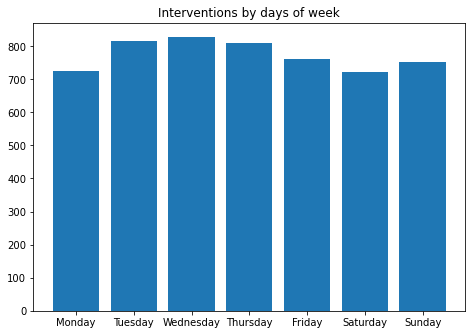

In [185]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(day_intervention.index, np.array(day_intervention['id']))

plt.title('Interventions by days of week')

#### 5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [194]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [191]:
type(population)

list

In [195]:
population = population[0]
population.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,NaN,California,39512223,37254523,6.1%,"+2,257,700",NaN,718404,745514,702885,11.96%
1,NaN,NaN,Texas,28995881,25145561,15.3%,"+3,850,320",NaN,763050,805441,698503,8.68%
2,NaN,NaN,Florida,21477737,18801310,14.2%,"+2,676,427",NaN,740611,795472,696468,6.44%
3,NaN,NaN,New York,19453561,19378102,0.4%,"+75,459",NaN,670812,720502,717707,5.91%
4,NaN,NaN,Pennsylvania,12801989,12702379,0.8%,"+99,610",NaN,640099,711222,705715,3.87%


In [199]:
states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [208]:
states = states[0]
states.head(20)

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [218]:
states.columns[0]

'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)'

In [219]:
states.columns[3]

'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3'

In [220]:
states.rename(columns={"Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)": "State", "Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3": "Abbreviation"}, inplace=True)

In [221]:
states

,State,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2",Abbreviation,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).6","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).7","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows diff

In [222]:
population = pd.merge(population,states[['State','Abbreviation']],on='State', how='left')

In [223]:
population.head(20)

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",Abbreviation
0,1.0,NaN,California,39512223,37254523,6.1%,"+2,257,700",NaN,718404,745514,702885,11.96%,CA
1,NaN,NaN,Texas,28995881,25145561,15.3%,"+3,850,320",NaN,763050,805441,698503,8.68%,TX
2,NaN,NaN,Florida,21477737,18801310,14.2%,"+2,676,427",NaN,740611,795472,696468,6.44%,FL
3,NaN,NaN,New York,19453561,19378102,0.4%,"+75,459",NaN,670812,720502,717707,5.91%,NY
4,NaN,NaN,Pennsylvania,12801989,12702379,0.8%,"+99,610",NaN,640099,711222,705715,3.87%,PA
5,NaN,NaN,Illinois,12671821,12830632,-1.2%,"−158,811",NaN,633591,703990,712864,3.85%,IL
6,NaN,NaN,Ohio,11689100,11536504,1.3%,"+152,596",NaN,649394,730569,721032,3.53%,OH
7,NaN,NaN,Georgia,10617423,9687653,9.6%,"+929,770",NaN,663589,758387,691975,3.18%,GA
8,NaN,NaN,North Carolina,10488084,9535483,10.0%,"+952,601",NaN,699206,806776,733498,3.14%,NC
9,NaN,NaN,Michigan,9986857,9883640,1.0%,"+103,217",NaN,624179,713347,705974,3.02%,MI


In [240]:
population.columns[-1]

'Abbreviation'

In [246]:
population.loc[0]['Abbreviation']

'CA'

In [247]:
type(population.loc[0]['Abbreviation'])

str

In [232]:
crimes_ratio = crimes.groupby('state').count()
crimes_ratio

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
state,,,,,,,,,,,,,,
AK,39,39,39,39,39,38,39,36,39,39,39,36,39,39
AL,104,104,104,104,98,99,104,95,104,104,104,102,104,104
AR,83,83,83,83,80,79,83,73,83,83,83,77,83,83
AZ,254,254,254,254,241,244,254,222,254,254,254,244,254,254
CA,799,799,799,799,766,738,799,701,799,799,799,761,799,799
CO,195,195,195,195,187,181,195,168,195,195,195,186,195,195
CT,21,21,21,21,19,21,21,20,21,21,21,20,21,21
DC,13,13,13,13,13,13,13,13,13,13,13,13,13,13
DE,13,13,13,13,11,13,13,10,13,13,13,13,13,13


In [233]:
type(crimes_ratio)

pandas.core.frame.DataFrame

In [234]:
crimes_ratio['state'] = crimes_ratio.index
crimes_ratio.index = range(crimes_ratio.shape[0])
crimes_ratio

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,state
0,39,39,39,39,39,38,39,36,39,39,39,36,39,39,AK
1,104,104,104,104,98,99,104,95,104,104,104,102,104,104,AL
2,83,83,83,83,80,79,83,73,83,83,83,77,83,83,AR
3,254,254,254,254,241,244,254,222,254,254,254,244,254,254,AZ
4,799,799,799,799,766,738,799,701,799,799,799,761,799,799,CA
5,195,195,195,195,187,181,195,168,195,195,195,186,195,195,CO
6,21,21,21,21,19,21,21,20,21,21,21,20,21,21,CT
7,13,13,13,13,13,13,13,13,13,13,13,13,13,13,DC
8,13,13,13,13,11,13,13,10,13,13,13,13,13,13,DE
9,350,350,350,350,335,336,350,324,350,350,350,336,350,350,FL


In [235]:
crimes_ratio.drop(['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'day_of_week'], axis=1, inplace=True)
crimes_ratio.head()

,id,state
0,39,AK
1,104,AL
2,83,AR
3,254,AZ
4,799,CA


In [236]:
crimes_ratio.rename(columns={"id": "No_of_crimes", "state": "Abbreviation"},inplace=True)
crimes_ratio.head()

,No_of_crimes,Abbreviation
0,39,AK
1,104,AL
2,83,AR
3,254,AZ
4,799,CA


In [250]:
crimes_ratio.loc[0]['Abbreviation']

'AK'

In [251]:
type(crimes_ratio.loc[0]['Abbreviation'])

str

In [253]:
crimes_ratio = pd.merge(crimes_ratio,population[['State','Population estimate, July 1, 2019[2]']],on='Abbreviation', how='left')

KeyError: 'Abbreviation'